In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Task 1

In [2]:
a=1 #границы отрезка
n=8 #колво узлов

In [115]:
def f(x):
    return (x**2 + 4*np.sin(x) - 2)

In [116]:
#подсчет коэффициентов полинома Лагранжа
def l_k(x, k, X):
    l=1
    for i in range(len(X)):
        if i!=k:
            l*=(x-X[i])/(X[k]-X[i])
    return l

In [117]:
# полином Лагранжа. Х-узлы
def L1(x,X): 
    L=0
    for i in range(len(X)):
        L+=l_k(x,i,X)*f(X[i])
    return L       

In [118]:
# поиск корней полинома Чебышева
def Ch(n,a):
    X=[]
    for i in range(n):
        X.append(a*np.cos((2*i+1)/(2*n+2)*np.pi))
    return X

In [119]:
x=np.linspace(-a,a,num=100)
X=np.linspace(-a,a, num=n)
X_Ch=Ch(n,a)

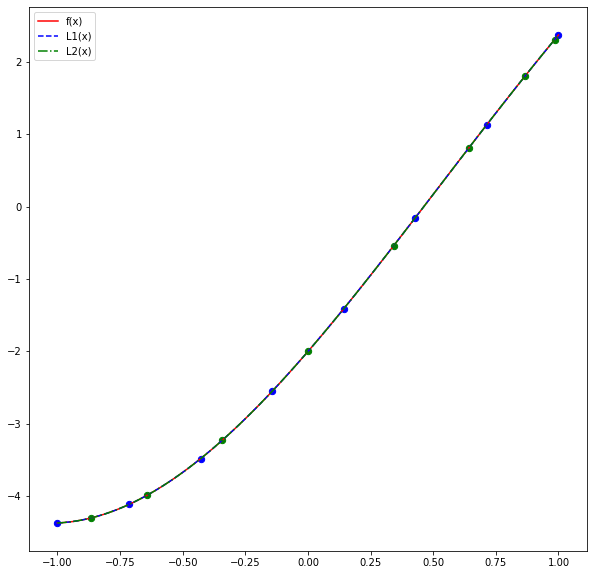

In [120]:
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
plt.plot(x, [f(_) for _ in x],'r-', label = 'f(x)')
plt.plot(x, L1(x,X), 'b--', label = 'L1(x)')
plt.plot(x, L1(x,X_Ch), 'g-.', label='L2(x)')
plt.scatter(X, L1(X,X), color='blue', s=40, marker='o')
plt.scatter(X_Ch, L1(X_Ch,X_Ch), color='green', s=40, marker='o')
# plt.axis('equal')
plt.legend()
plt.show()

In [154]:
# подсчет погрешности
def E1(x,X):
    max=0
    for i in x:
        diff=abs(f(i)-L1(i,X))
        if diff>max:
            max=diff
    return max        

In [155]:
print(E1(x,X),E1(x,X_Ch))

0.003612190912622104 4.216528770584205e-08


In [156]:
N=np.random.choice(np.arange(3,12), size=5, replace=False) 
print('N\t',end=' ')
for i in N:
    print(i,'\t\t\t', end=' ')
print('\nL_p\t', end='')
for i in N:
    X=np.linspace(-a,a, num=i)
    print(E1(x,X),'\t', end='')
print('\nL_Ch\t', end='')
for i in N:
    X_Ch=Ch(i,a)
    print(E1(x,X_Ch),'\t', end='')

N	 9 			 4 			 8 			 6 			 3 			 
L_p	2.0163284908392143e-07 	0.004871178437158896 	2.801097016558174e-07 	4.6523466476600106e-05 	0.23996559957493613 	
L_Ch	1.7091574884275929e-06 	0.0020174366612324413 	4.216528770584205e-08 	1.209005716740208e-05 	1.0371728649405298 	

# Task 2

In [157]:
def h(x):
    return f(x)*abs(x)

In [158]:
# полином Лагранжа. Х-узлы
def L2(x,X): 
    L=0
    for i in range(len(X)):
        L+=l_k(x,i,X)*h(X[i])
    return L   

In [159]:
# подсчет погрешности
def E2(x,X):
    max=0
    for i in x:
        diff=abs(h(i)-L2(i,X))
        if diff>max:
            max=diff
    return max  

In [160]:
x=np.linspace(-a,a,num=200)
N=np.random.choice(np.arange(3,12), size=5, replace=False)      #np.random.randint(3, 12, )
print('N\t',end=' ')
for i in N:
    print(i,'\t\t\t', end=' ')
print('\nL_p\t', end='')
for i in N:
    X=np.linspace(-a,a, num=i)
    print(E2(x,X),'\t', end='')
print('\nL_Ch\t', end='')
for i in N:
    X_Ch=Ch(i,a)
    print(E2(x,X_Ch),'\t', end='')

N	 8 			 10 			 4 			 11 			 6 			 
L_p	0.24887024861101947 	0.35790055523742215 	0.5784776434765804 	1.4184988067990305 	0.2833999305057272 	
L_Ch	2.7293362408155746 	2.6603936654872262 	3.734093155152979 	0.722439676447979 	2.9001414937358687 	

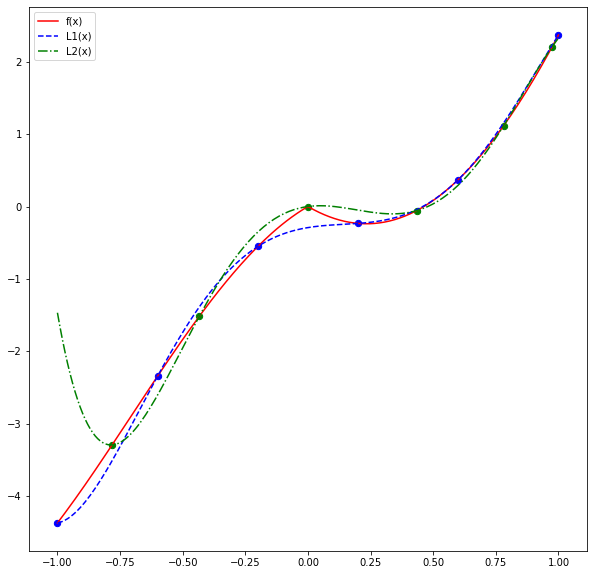

In [161]:
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
plt.plot(x, [h(_) for _ in x],'r-', label = 'f(x)')
plt.plot(x, L2(x,X), 'b--', label = 'L1(x)')
plt.plot(x, L2(x,X_Ch), 'g-.', label='L2(x)')
plt.scatter(X, L2(X,X), color='blue', s=40, marker='o')
plt.scatter(X_Ch, L2(X_Ch,X_Ch), color='green', s=40, marker='o')
# plt.axis('equal')
plt.legend()
plt.show()

# TASK 3

In [4]:
def f_1(x):
    return (2*x + 4*np.cos(x))

In [5]:
def f_2(x):
    return (2-4*np.sin(x))

In [11]:
def f_3(x):
    return (-4*np.cos(x))

In [145]:
F=[f,f_1, f_2, f_3]

In [146]:
def Hermite(x,X,m):
    n=len(X)  # n data points, m derivatives
    # derivative matrix
    matrix=np.zeros((n,m)) 
    for i in range(n):
        for j in range(m):
            matrix[i,j]=F[j](X[i])
    dd=DividedDifference(X,matrix,m)
    P=dd[0,0]
    u=1
    for i in range(n):
        u*=(x-X[i])
        for j in range(m):
            l=(i)*m+j;         # index of the coefficient 
            P+=dd[l,l]*u   
    return P

In [152]:
X=np.linspace(-a,a, num=5)
x=np.linspace(-a,a,num=200)
P=Hermite(x,X,len(F))
len(P)

200

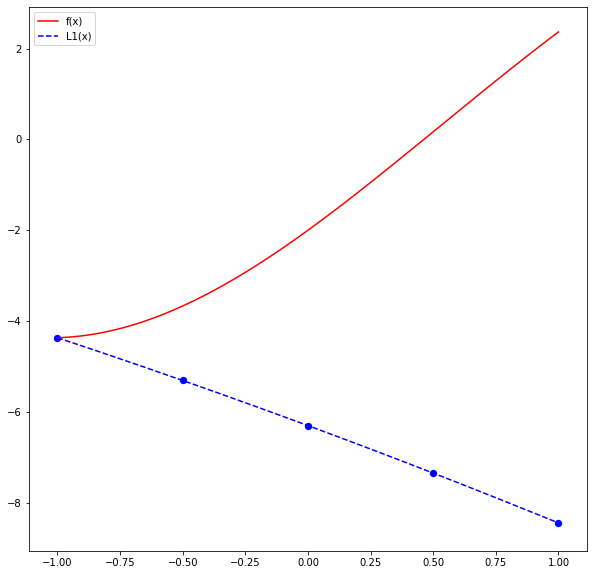

In [153]:
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
plt.plot(x, f(x),'r-', label = 'f(x)')
plt.plot(x, Hermite(x,X,len(F)), 'b--', label = 'L1(x)')
# plt.plot(x, L2(x,X_Ch), 'g-.', label='L2(x)')
plt.scatter(X, Hermite(X,X,len(F)), color='blue', s=40, marker='o')
# plt.scatter(X_Ch, L2(X_Ch,X_Ch), color='green', s=40, marker='o')
# plt.axis('equal')
plt.legend()
plt.show()

In [151]:
def DividedDifference(X, df, m):
    n=len(X)
    dd=np.zeros((n*m, n*m)) # matrix of divided difference
    z=np.zeros(n*m)
    k=0 # row index
    for i in range(n):
        for j in range(m):
            z[k]=X[i]
            dd[k,0]=df[i,0] #float("{0:.3f}".format(df[i,0]))
            for l in range(1,k+1):
                if (dd[k,l-1]==dd[k-1,l-1]) and (z[k]==z[k-1]):
                    dd[k,l]=df[i, l] / math.factorial(l)
                else:
                    dd[k,l]=(dd[k, l - 1] - dd[k - 1, l - 1])/(z[k]-z[k-l])
            k+=1
#     print(dd)
    return dd